In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
# from keras.models import Sequential
print(tf.__version__)


2.18.0


This is a function to plot test and predicted values

In [3]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real TSLA stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("TSLA stock price prediction")
    plt.xlabel("time")
    plt.ylabel("TSLA stock price")
    plt.legend()
    plt.show()

Function to calculate RMSE

In [4]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [5]:
data = pd.read_csv("C:/Users/parth/OneDrive/Desktop/test TSLA/TSLA.csv")

# train.shape
# test.shape

In [6]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
data['Date'] = pd.to_datetime(data['Date'],format="mixed")

In [8]:
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

In [9]:
train = data[:'2015'].iloc[:,1:2].values
test = data['2016':].iloc[:,1:2].values

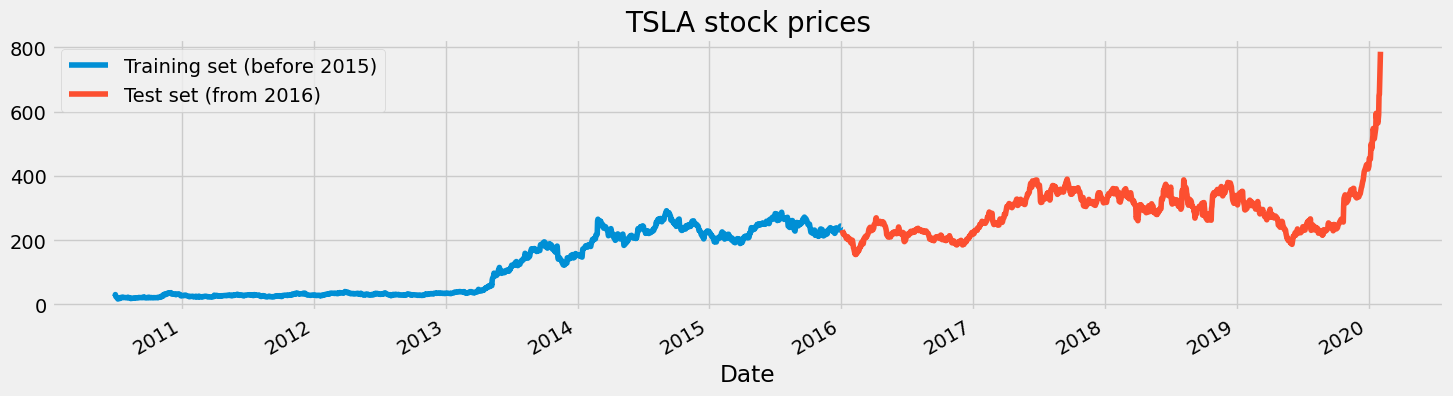

In [10]:
data["High"][:'2015'].plot(figsize=(16,4), legend=True)
data["High"]["2016":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2015)", "Test set (from 2016)"])
plt.title("TSLA stock prices")
plt.show()

In [11]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [12]:
x_train = []
y_train = []

for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train[0]

array([0.03045963, 0.05018378, 0.03380764, 0.02354526, 0.01226391,
       0.        , 0.00323884, 0.00462171, 0.00524037, 0.00731468,
       0.01280979, 0.01772263, 0.0169948 , 0.02045198, 0.01899633,
       0.01553914, 0.01681284, 0.01794097, 0.01772263, 0.0165581 ,
       0.01553914, 0.01546636, 0.01386514, 0.01579388, 0.01936025,
       0.02019724, 0.01790458, 0.01284618, 0.01219113, 0.01099021,
       0.00818807, 0.00462171, 0.00662325, 0.00789694, 0.01008043,
       0.01077187, 0.00953456, 0.00902508, 0.01368318, 0.01120856,
       0.01219113, 0.01324648, 0.01179083, 0.01295535, 0.0114997 ,
       0.01477493, 0.01677645, 0.0169948 , 0.01590306, 0.0157211 ,
       0.01608501, 0.01564832, 0.01553914, 0.01808654, 0.0195422 ,
       0.0237636 , 0.01706758, 0.01717676, 0.01790458, 0.0157211 ])

In [14]:
y_train[0]

np.float64(0.012773389938398563)

In [15]:
len(x_train)

1328

In [16]:
len(y_train)

1328

In [17]:
x_train.shape

(1328, 60)

In [18]:
y_train.shape

(1328,)

In [19]:
# reshaping x_train for efficient modelling

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape

(1328, 60, 1)

In [21]:
# LSTM architecture

regressor = Sequential()

# add first layer with dropout

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# add second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add third layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add fourth layer

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# the output layer

regressor.add(Dense(units=1))

In [22]:
# compiling the LSTM RNN network

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit to the training set

regressor.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0545
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0126
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0081
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0070
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0082


In [23]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing

dataset_total = pd.concat((data['High'][:'2015'], data['High']['2016':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(2416,)
(1088,)
(1088, 1)
(1088, 1)


In [24]:
# preparing x_test

x_test = []
for i in range(60,1088):  #where 1035 is the length of the inputs
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
# predicting the stock prices for test set

predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


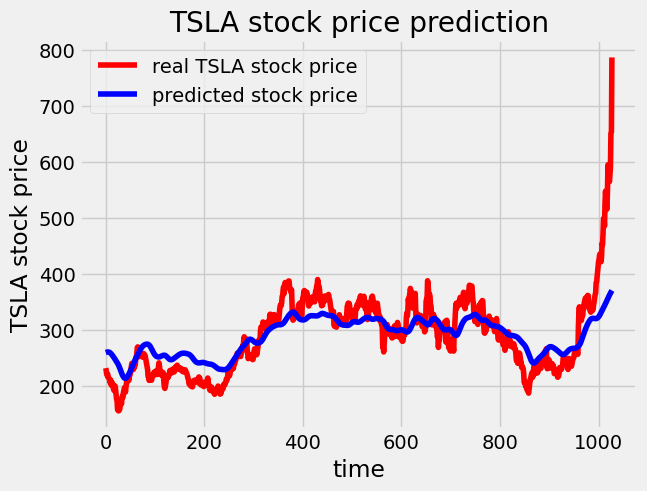

In [26]:
# visualizing the results: predicted vs test

plot_predictions(test, predicted)

In [27]:
# evaluating the model

return_rmse(test, predicted)

the root mean squared error is : 44.29338989393257.


GRU Component

In [28]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [29]:
# compiling the model

regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train, y_train, epochs=5, batch_size=150)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.2037
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.1034
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0518
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0158
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0081


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


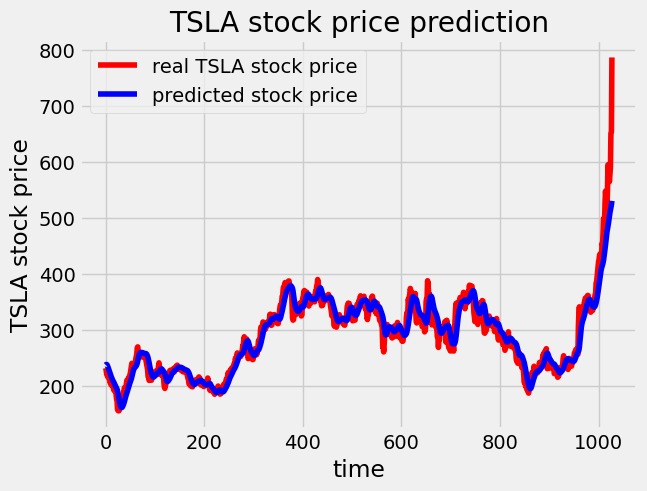

In [30]:
# predicting the stock prices for test set and visualization

predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

plot_predictions(test, predicted_with_gru)

In [31]:
# evaluating the model performance

return_rmse(test, predicted_with_gru)

the root mean squared error is : 21.28043168524272.
